In [1]:
from data_loader import Data_Loader

import pm4py
 
num = 1
path = f'/Users/philippeichhorn/Downloads/Compositional process discovery_experiment data/IP-{num}/IP-{num}_initial_log.xes'
list_of_nets = Data_Loader.create_petri_nets(path)

/Users/philippeichhorn/anaconda3/envs/i2dl/lib/python3.10/site-packages/pm4py/util/dt_parsing/parser.py:77: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(
/Users/philippeichhorn/anaconda3/envs/i2dl/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 5000/5000 [00:02<00:00, 1730.49it/s]


In [2]:
from pm4py.objects.petri_net.utils import petri_utils
import pm4py.objects.petri_net.utils as pnutils
from pm4py.objects.petri_net.obj import PetriNet
from InteractionUtils import InteractionUtils
# class InteractionUtils:

    # @staticmethod
    # def connect_async_interactions(net: PetriNet):
    #     for trans in net.transitions:
    #         if trans.label and '!' in trans.label:
    #             trans.properties.update({"resource": '!'})
    #             for trans2 in net.transitions:
    #                 if trans2.label == trans.label.replace('!', '?'):
    #                     trans2.properties.update({"resource": '?'})
    #                     new_place = pnutils.petri_utils.add_place(net, "resource", )
    #                     new_place.properties.update({"resource":True})
    #                     pnutils.petri_utils.add_arc_from_to(trans, new_place,net)
    #                     pnutils.petri_utils.add_arc_from_to(new_place, trans2, net)

    # @staticmethod
    # def connect_sync_interactions(net:PetriNet):
    #     for trans in net.transitions.copy():
    #         for trans2 in net.transitions.copy():
    #             if net.transitions.__contains__(trans2):
    #                 if trans.name == trans2.name:
    #                     for arc in trans2.in_arcs.copy():
    #                         petri_utils.add_arc_from_to(arc.source, trans, net)
    #                     for arc in trans2.out_arcs.copy():
    #                         petri_utils.add_arc_from_to(trans, arc.target , net)
    #                     trans.properties.update({"resource":"s"})
    #                     petri_utils.remove_transition(net, trans2)


    # @staticmethod
    # def merge_two_nets(a, b):
    #     merged_net = pnutils.petri_utils.merge(nets=[a, b])
    #     InteractionUtils.connect_async_interactions(merged_net)
    #     InteractionUtils.connect_sync_interactions(merged_net)
    #     return merged_net

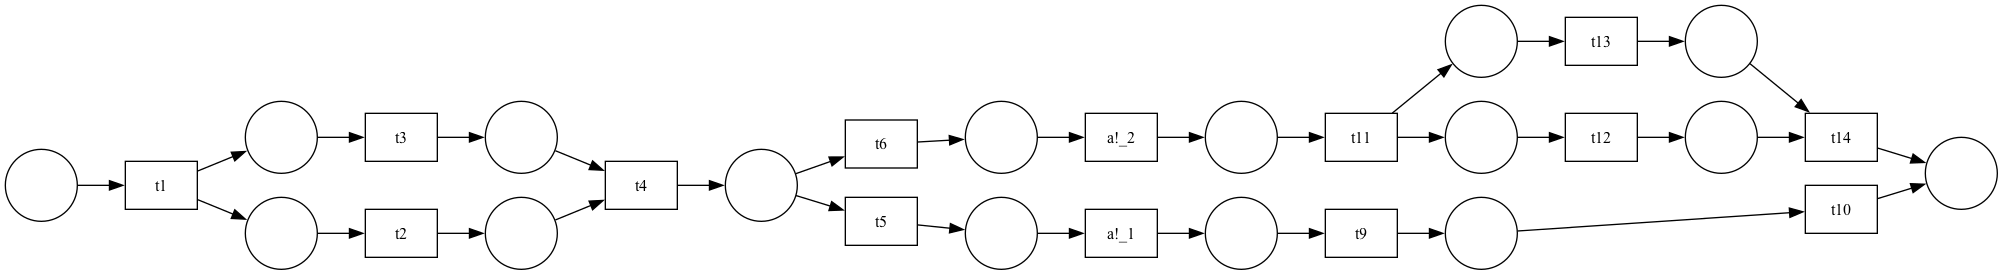

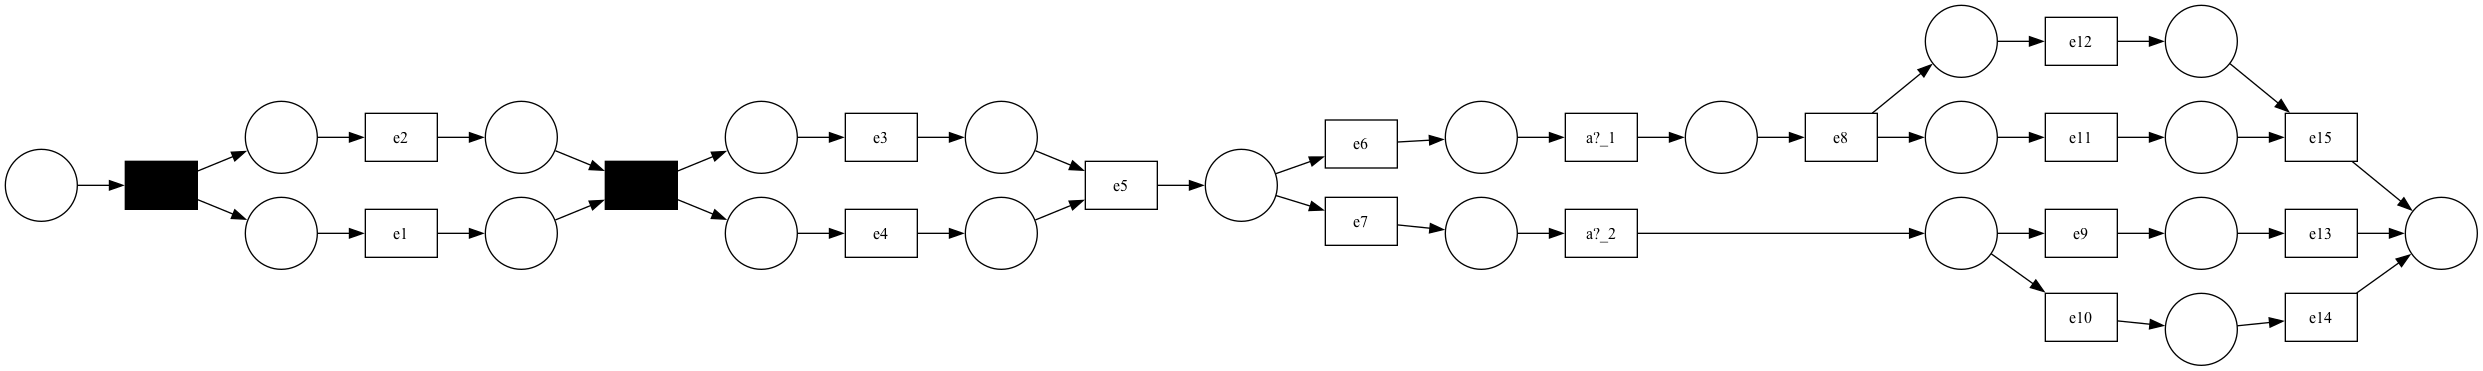

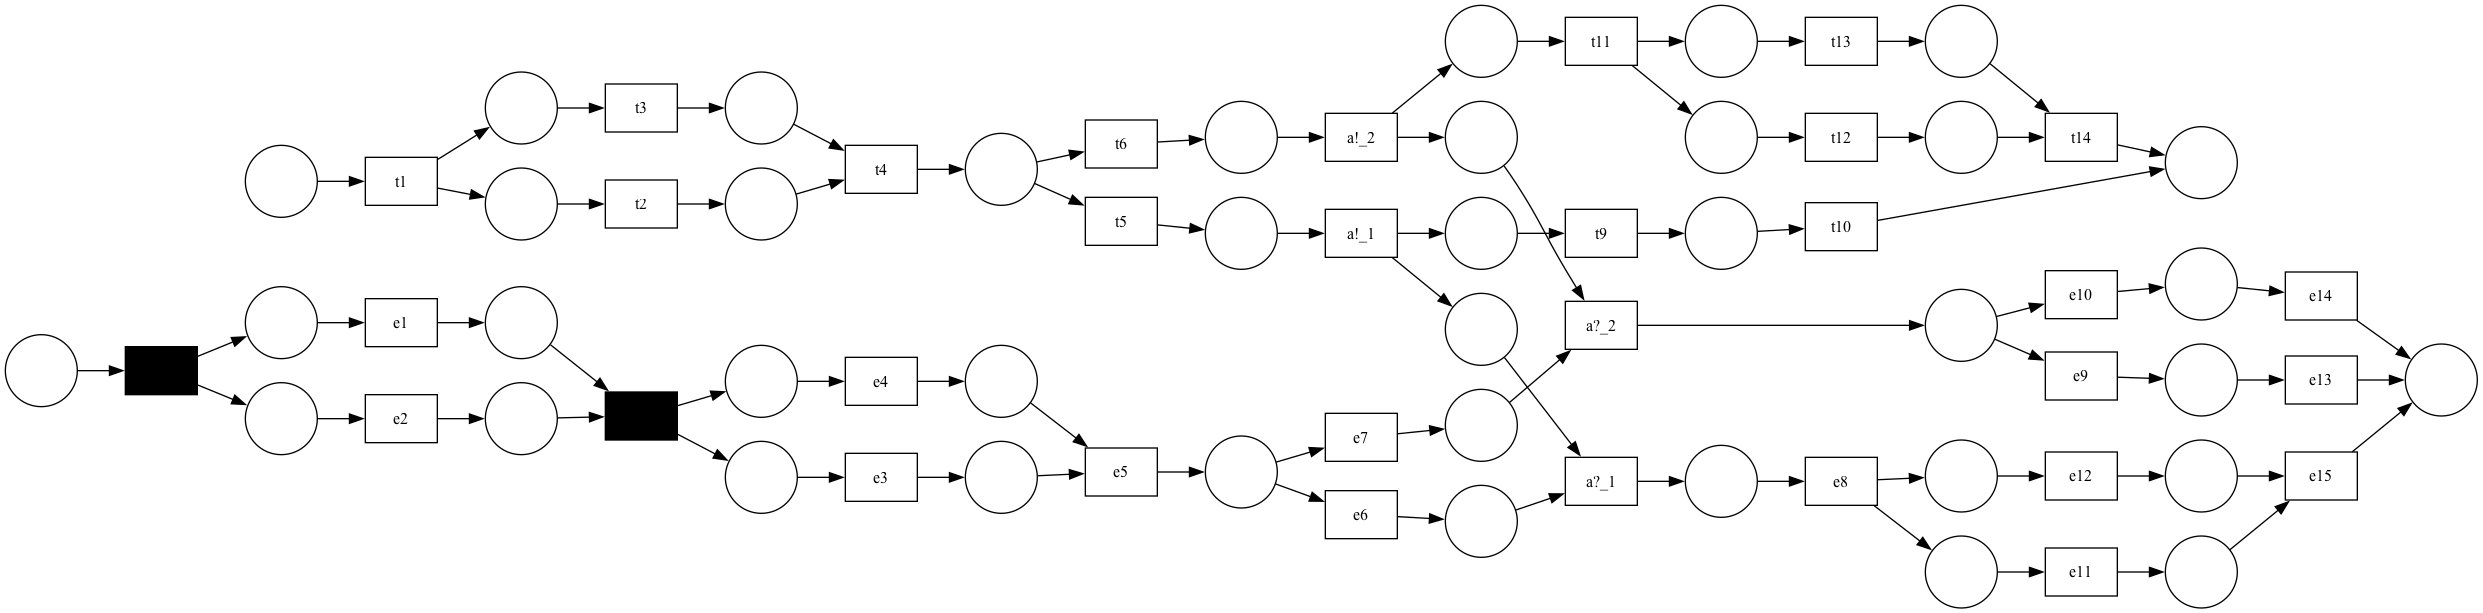

In [3]:

net1, b,b = list_of_nets[0]
net2, b,b = list_of_nets[1]
pm4py.view_petri_net(net1)
pm4py.view_petri_net(net2)

net = InteractionUtils.merge_two_nets(net1, net2)
pm4py.view_petri_net(net)



count:  0


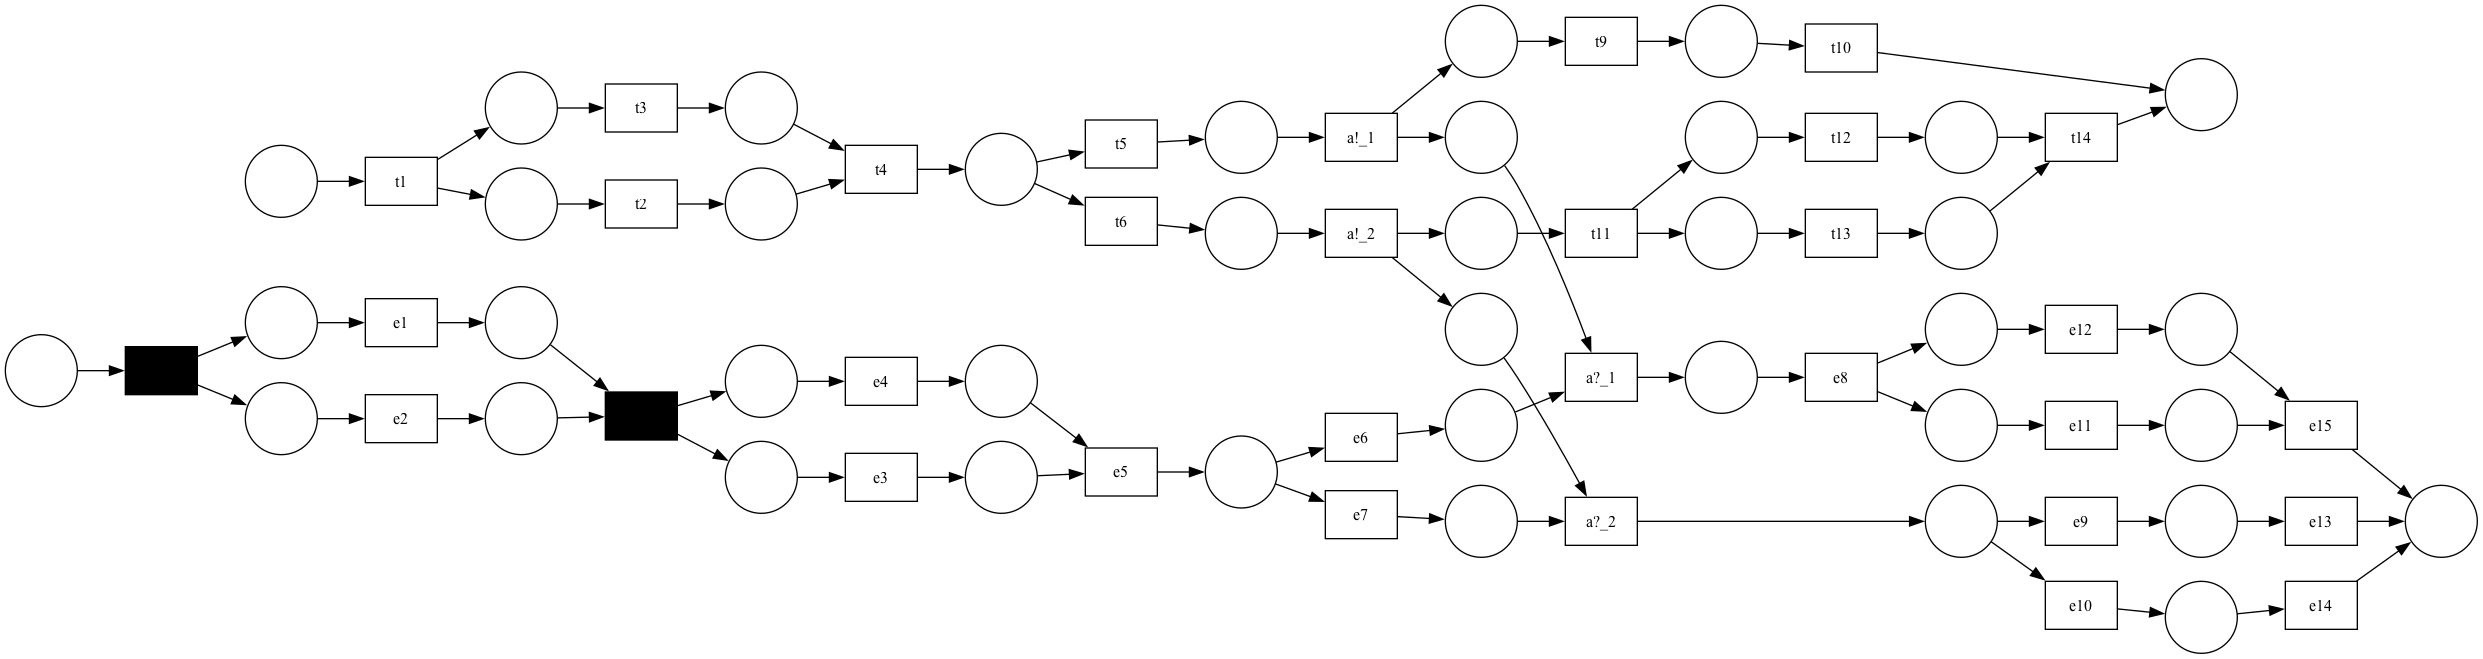

t12
Local transition removed
e1
Local transition removed
t5
Local transition removed
t3
Local transition removed
e13
Local transition removed
e2
Local transition removed
e14
Local transition removed
e12
Local transition removed
e6
Local transition removed
e4
Local transition removed
t13
Local transition removed
e11
Local transition removed
t10
Local transition removed
t9
Local transition removed
e3
Local transition removed
t6
Local transition removed
t2
Local transition removed
e7
Local transition removed
count:  1


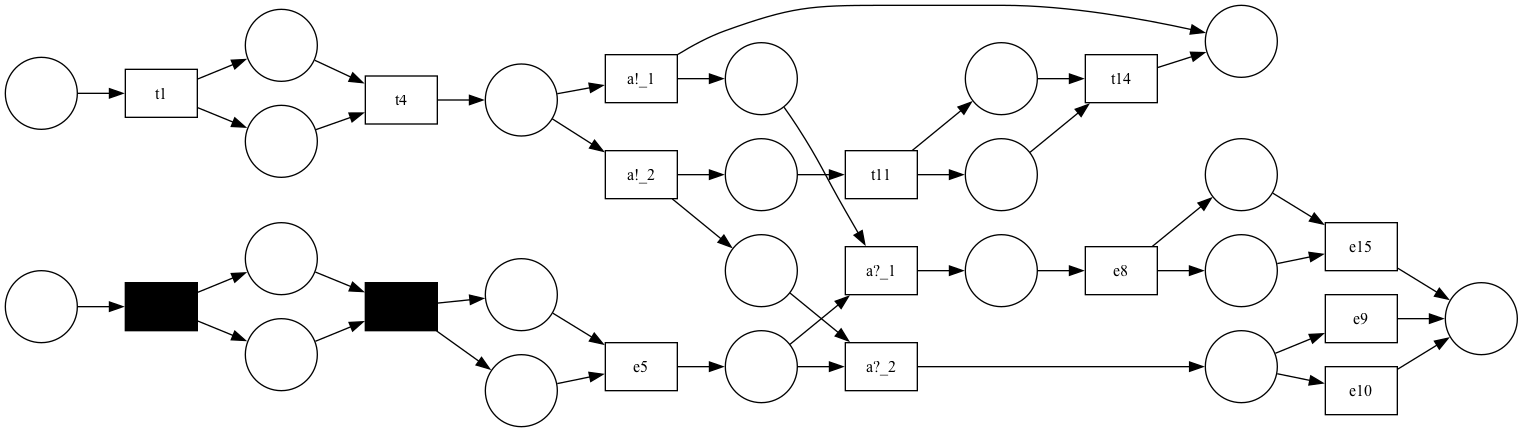

remove place:  ['t11'] ['t14']
Place removed
remove place:  [None] ['e5']
Place removed
remove place:  ['e8'] ['e15']
Place removed
remove place:  [None] [None]
Place removed
remove place:  ['t1'] ['t4']
Place removed
removing transition:  e10 e9
Transition removed
t1
Local transition removed
None
Local transition removed
e5
Local transition removed
t14
Local transition removed
e15
Local transition removed
e9
Local transition removed
None
Local transition removed
t11
Local transition removed
e8
Local transition removed
t4
Local transition removed
count:  2


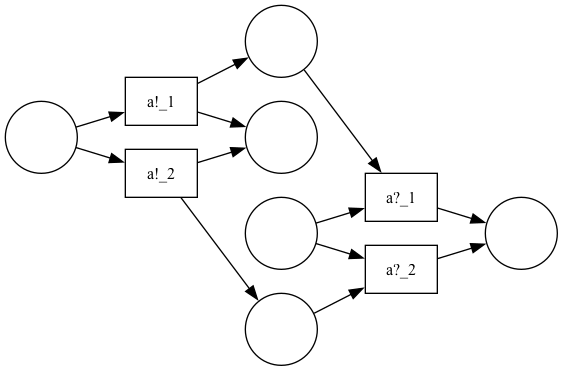

count:  3


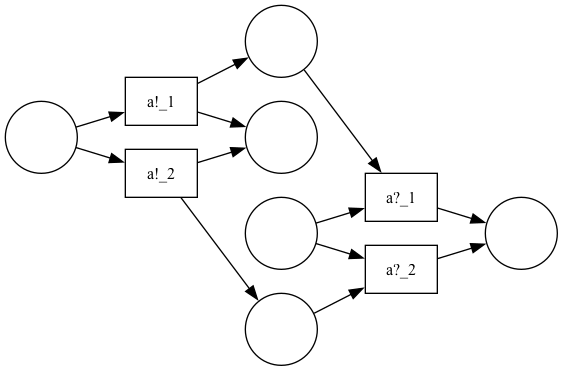

count:  4


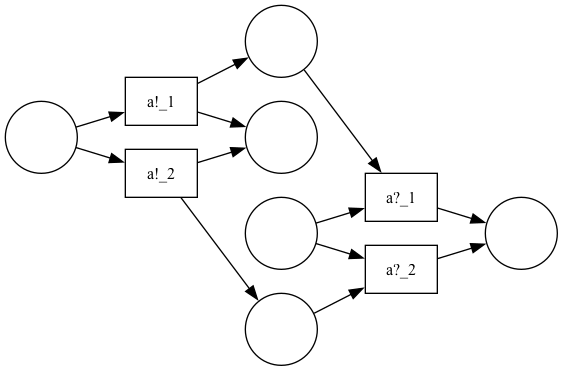

count:  5


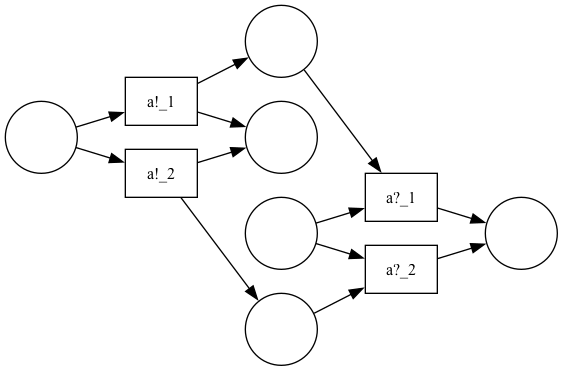

count:  6


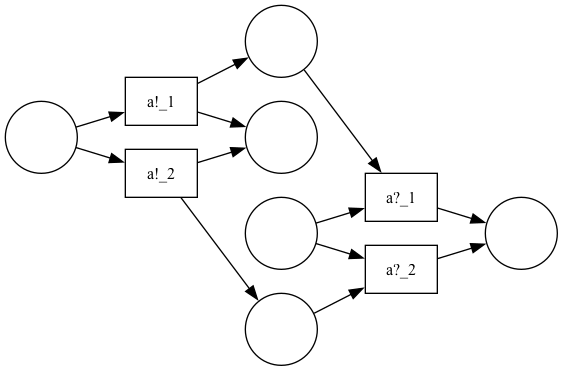

count:  7


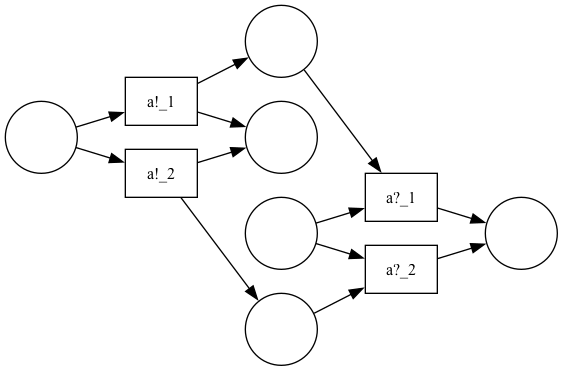

count:  8


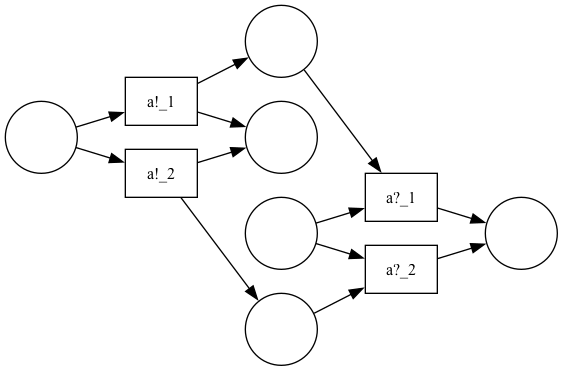

count:  9


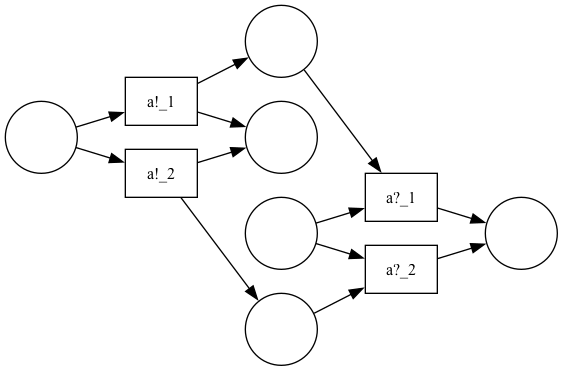

count:  10


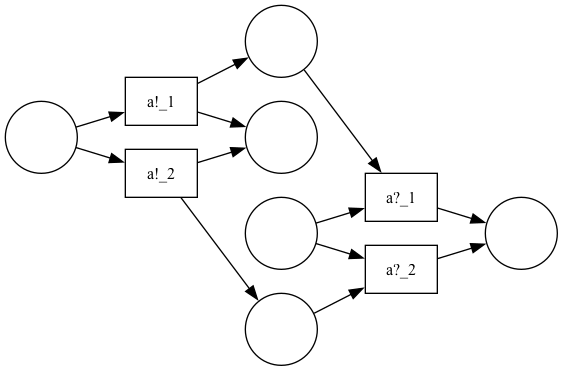

count:  11


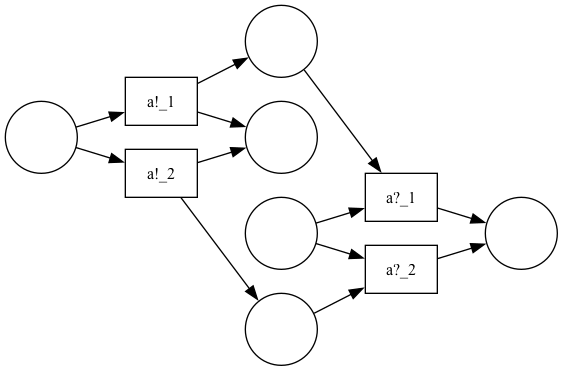

count:  12


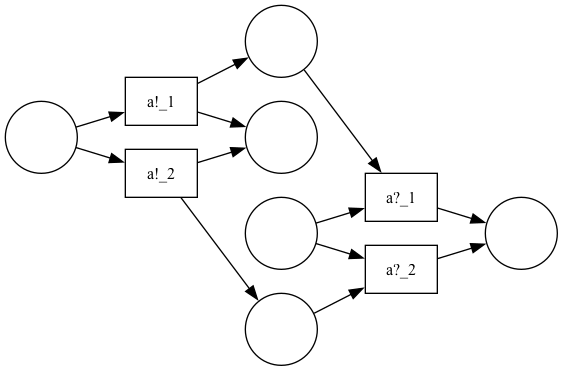

count:  13


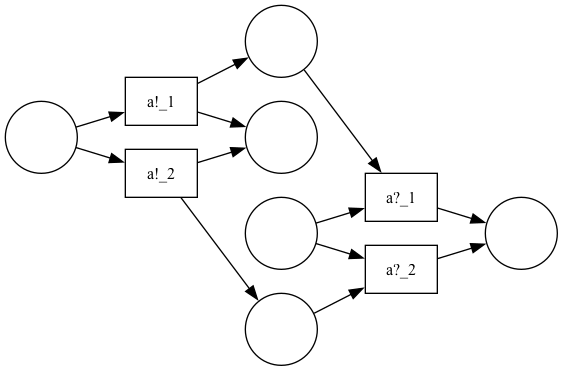

count:  14


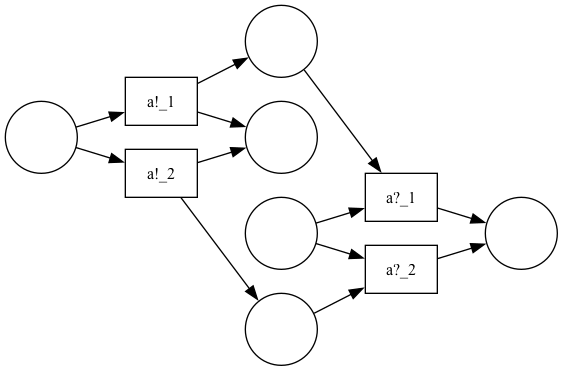

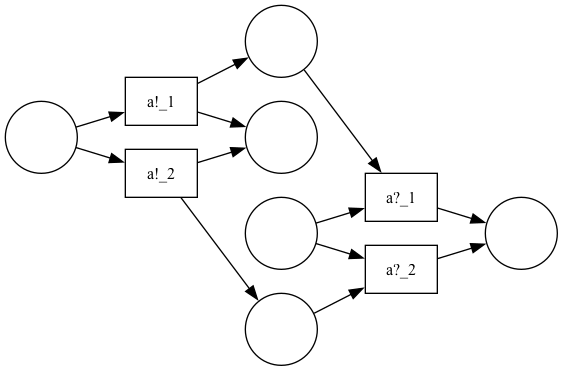

Different number of places: 6 vs 5
False
Different number of places: 6 vs 12
False
Isomorphic mapping found.
True
Different number of places: 6 vs 8
False
Different number of places: 6 vs 18
False
Different number of places: 6 vs 12
False
Different number of places: 6 vs 11
False
Different number of places: 6 vs 24
False
Different number of places: 6 vs 10
False
Different number of places: 6 vs 10
False
Different number of places: 6 vs 14
False
Different number of places: 6 vs 10
False


In [4]:

from pm4py import PetriNet
from Reducer import Reducer
from Refiner import Refiner
from interface_patterns import interface_patterns
from refinement_algorithm import are_petri_nets_isomorphic

pnet = net.__deepcopy__()

pnet, changes = Reducer.apply(pnet)
pm4py.view_petri_net(pnet)
# Refiner.reverse_apply(pnet, changes)
patterns = interface_patterns.get_patterns()
for p in patterns:
    p, _,_ = p
    print(are_petri_nets_isomorphic(pnet, p))
# pm4py.view_petri_net(pnet)

# def remove_transition(net, transition):
#     #check if current transition has one in on out arc (might not be sufficient todo check)
#     # find a t1
#     for other_trans in net.transitions:
#         if(other_trans != transition and petri_utils.pre_set(transition)== petri_utils.pre_set(other_trans) 
#             and petri_utils.post_set(transition)==petri_utils.post_set(other_trans)):
#             petri_utils.remove_transition(net, transition)
#             print("removing transition: ", transition.label, other_trans.label)
#             return True
#     return False

# count = 0
# pnet = net.__deepcopy__()
# pm4py.view_petri_net(pnet)



# while (count <=10):
#     count += 1
#     for place in pnet.places.copy():
#         if not place.properties.keys().__contains__('sync'):
#             if Reducer.remove_place(pnet, place):
#                 pm4py.view_petri_net(pnet)
#                 print("Place removed")

#     for transition in pnet.transitions.copy():
#         if not transition.properties.keys().__contains__('sync'):
#             if remove_transition(pnet, transition):
#                 pm4py.view_petri_net(pnet)
#                 print("Transition removed")
    
#     for transition in pnet.transitions.copy():
#         if not transition.properties.keys().__contains__('sync'):
#             if Reducer.remove_local_transition(pnet, transition):
#                 pm4py.view_petri_net(pnet)
#                 print("Local transition removed")



